In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats 
import random

In [5]:
df = pd.read_csv("/Users/matteo/Desktop/Bachelor /Projet Entreprise/2019Floor7.csv")

In [6]:
#selectionner que certaine ligne pour test code 
#dfe = df[2060:2120]
dfe = df[2000:2100]

# Class to generate data

In [7]:
class preparation:
    def __init__(self,df,n_plug):
        self.df, self.n_plug, = df,n_plug

    def clean(self):
        #selectionner que les column date et conso plug 
        columns = ['Date', 'z1_Plug(kW)']
        dfc = self.df[columns]
        dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W
        dfc = dfc.rename(columns={'z1_Plug(kW)': "z1_Plug(W)"})

        for i in range (1,self.n_plug+1):
            name_col='p'+str(i)
            dfc[name_col]=np.nan
            
        return dfc

In [8]:
class generation:
    def __init__(self,df,n_plug,perc_change,n_high_device):
        self.df, self.n_plug, self.perc_change, self.n_high_device = df,n_plug,perc_change,n_high_device
    
    def create_value_plugs(self,valeur_totale,row):
        data=[]
        while sum(data) != valeur_totale :
            data = np.random.poisson(valeur_totale/self.n_plug, self.n_plug)
        data = np.sort(data)
        for j in range (1,self.n_plug+1) :
            col_name='p'+str(j)
            self.df[col_name][row]=data[j-1]

    def split_value_opt(self):
        valeur_precedente = -1 #pour initialiser et pouvoir lancer la première fois
        same = True #permet de savoir si on est sur la même augmentation ou non 
        rand = 1 #numéro de la prise, permet de mettre l'augmentation sur différentes prises 
        compteur = 0 #permet de changer une longue augmentation en normal 
        for row in self.df.index: #faire chaque ligne 
            valeur_totale = self.df["z1_Plug(W)"][row] #valeur total de la ligne (data déjà existant) 
            if valeur_precedente < 0 or valeur_totale < valeur_precedente*(1+self.perc_change/100) and valeur_totale > valeur_precedente*(1-self.perc_change/100) or compteur >6: #valeur normal, pas d'augmentation de x% par rapport à la valeur précédente, ni de garder une hausse trop longtemps 
                self.create_value_plugs(valeur_totale,row) #creation de valeur 
                same=False #réinitialisation 
                valeur_precedente = valeur_totale #réinitialisation 
                compteur = 0 #réinitialisation 
            else : 
                self.create_value_plugs(valeur_precedente,row) #si changement de plus de x% 
                if same == True : #si suite d'une hausse (pas de retour à valeur normal)
                    compteur +=1 #permet de ne pas garder une hausse trop longtemps 
                else:
                    rand = random.randint(1,self.n_high_device) #changement de prise 
                    same = True #pour garder la hausse sur la même prise 
                    compteur = 0 #réinitialisation
                plug='p'+str(100-rand) #sélection de la prise à changer 
                self.df[plug][row]= self.df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse
        return self.df
        


In [9]:
testdata= preparation(dfe, 100)

In [10]:
newdata = testdata.clean()

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_2037/544159150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W
/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_2037/544159150.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfc[name_col]=np.nan


In [11]:
newdata

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2019-01-02 09:21:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2019-01-02 09:22:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2019-01-02 09:23:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2019-01-02 09:24:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2019-01-02 10:55:00,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,2019-01-02 10:56:00,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,2019-01-02 10:57:00,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,2019-01-02 10:58:00,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gen = generation(newdata, 100, 30, 6)

In [13]:
finaldf = gen.split_value_opt()

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_2037/753125622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col_name][row]=data[j-1]
/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_2037/753125622.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[plug][row]= self.df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse


In [14]:
finaldf.head()

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,6.0
2001,2019-01-02 09:21:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
2002,2019-01-02 09:22:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0
2003,2019-01-02 09:23:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0
2004,2019-01-02 09:24:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0


# Plot 

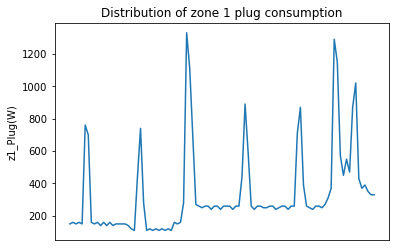

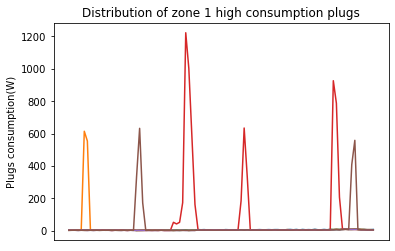

In [15]:
plt.plot('Date','z1_Plug(W)' , data = finaldf )
plt.title('Distribution of zone 1 plug consumption')
plt.ylabel('z1_Plug(W)')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

plt.plot('Date', 'p100', data=finaldf)
plt.plot('Date', 'p99', data=finaldf)
plt.plot('Date', 'p98', data=finaldf)
plt.plot('Date', 'p97', data=finaldf)
plt.plot('Date', 'p96', data=finaldf)
plt.plot('Date', 'p95', data=finaldf)
plt.title('Distribution of zone 1 high consumption plugs')
plt.ylabel('Plugs consumption(W)')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [16]:
plotdf = finaldf.loc[finaldf['Date'] == '2019-01-02 10:05:00']
plotdf

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2045,2019-01-02 10:05:00,260.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0


In [17]:
plotdf = plotdf.drop(['Date', 'z1_Plug(W)'], axis = 1)
df_t = plotdf.T
df_t

,2045
p1,0.0
p2,0.0
p3,0.0
p4,0.0
p5,0.0
...,...
p96,5.0
p97,5.0
p98,5.0
p99,6.0


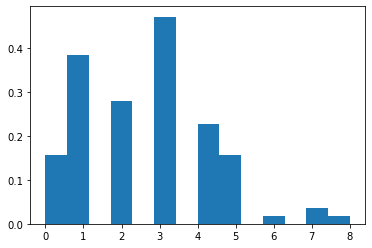

In [94]:
count, bins, ignored = plt.hist(df_t, 14, density=True)
plt.show()

plotdf2 = finaldf.loc[finaldf['Date'] == '2019-01-02 09:58:00']
plotdf2 = plotdf2.drop(['Date', 'z1_Plug(W)'], axis = 1)
df_t2 = plotdf2.T
count, bins, ignored = plt.hist(df_t2, 10, density=True)
plt.show()